In [2]:
import numpy as np
from typing import Tuple
import pandas as pd

def load_data(train_data: bool =True) -> Tuple[np.ndarray, np.ndarray]:
  
  # loads train/test features with image labels.  
  
  if train_data:
    data = np.load(f'train_data.npz')
  else:
    data = np.load(f'test_data.npz')

  features = data['features']
  img_labels = data['img_labels']
  
  return features, img_labels

def load_data_with_domain_label() -> Tuple[np.ndarray, np.ndarray]:
  
  # loads portion of training features with domain label
  
  data = np.load(f'train_data_w_label.npz')
  train_features = data['features']
  domain_labels = data['domain_labels']
  
  return train_features, domain_labels

# Train Data with image labels
train_features, image_labels = load_data(True)
train_features = pd.DataFrame(train_features)
image_labels = pd.DataFrame(image_labels)


# 5% of train data with domain label
train_features_w_domain, image_labels_w_domain = load_data_with_domain_label()
train_features_w_domain = pd.DataFrame(train_features_w_domain)
image_labels_w_domain = pd.DataFrame(image_labels_w_domain)


In [3]:
from sklearn.model_selection import train_test_split

train_features, not_important, image_labels, not_important = train_test_split(train_features, image_labels,
                                                                              test_size=0.75, random_state=10)

train_features

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
4745,0.343874,-1.307049,-0.204278,-0.005591,-0.682231,0.282288,0.023778,-0.856045,-1.182249,1.869645,...,-0.815373,-1.146827,-0.697858,-1.173380,-0.865578,-0.105714,0.385707,-1.330678,-0.566672,0.882072
18902,0.502485,-1.548745,0.431635,-0.133678,-0.530884,-0.232890,-0.309710,0.158396,0.142478,0.408174,...,-0.502683,0.138769,0.219905,0.417431,-0.304217,-0.217000,0.259915,0.189763,0.469738,-0.606306
13790,0.804214,1.286028,-0.960197,0.190854,1.297905,-0.709355,0.839494,0.056868,0.075384,0.913891,...,1.178913,1.256338,1.193748,0.037349,0.069393,0.011623,-0.050124,2.327208,0.616420,-0.807680
3986,1.003423,0.226748,-0.136161,0.717590,0.936374,0.047178,0.735006,1.598828,0.412473,0.911582,...,1.187870,0.017912,0.716165,0.084331,-0.054933,0.732008,0.151038,-0.018917,0.305826,-0.169571
528,0.831020,1.110606,1.751032,0.827517,0.854560,0.766325,1.140626,1.573026,-0.374184,-0.309571,...,1.630931,-0.251499,0.473045,0.981599,1.712264,0.143371,-0.645165,0.127411,0.888460,-0.396377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,-1.132427,0.379787,-0.092115,-1.107114,1.113072,0.151696,-0.612844,1.028744,0.388984,-0.489484,...,-0.249395,0.621105,0.400724,0.117752,0.461943,-0.801570,-0.788175,0.082162,0.988576,0.015236
7291,0.256584,-0.695573,1.110308,0.155036,-0.848521,-0.395721,0.704194,-0.262806,-0.071950,0.946157,...,-0.218751,-0.416531,-0.545625,-0.664593,-0.581285,0.650801,1.370228,-0.691042,-0.018858,0.687375
17728,1.385944,0.405978,1.865309,2.002011,0.040682,0.739627,0.679140,-0.674543,-0.459619,1.542602,...,1.037636,0.171291,0.189254,0.633337,0.601100,0.818919,0.391262,0.367911,0.313972,-0.062454
7293,-0.409991,-0.491464,-0.226897,-0.838430,0.064612,0.276936,-0.774000,-0.207615,0.618984,-0.078387,...,-1.131775,0.777408,-0.772137,-0.244058,-0.491947,-0.625199,-0.709043,0.654583,0.747353,1.246121


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 2.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 7.317333
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.596008
[t-SNE] KL divergence after 1000 iterations: 1.392131


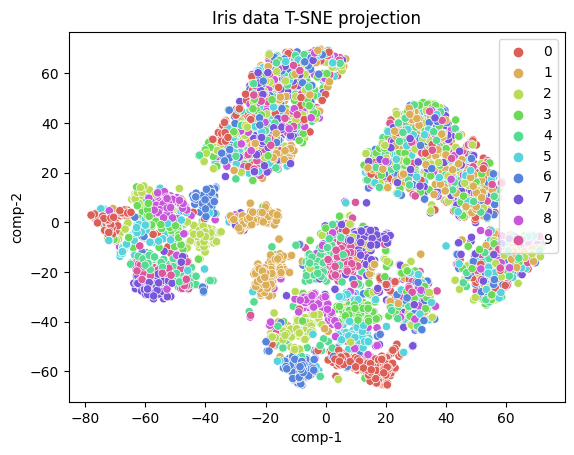

In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns

x = train_features
y = image_labels

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="Iris data T-SNE projection")
import matplotlib.pyplot as plt
plt.show()

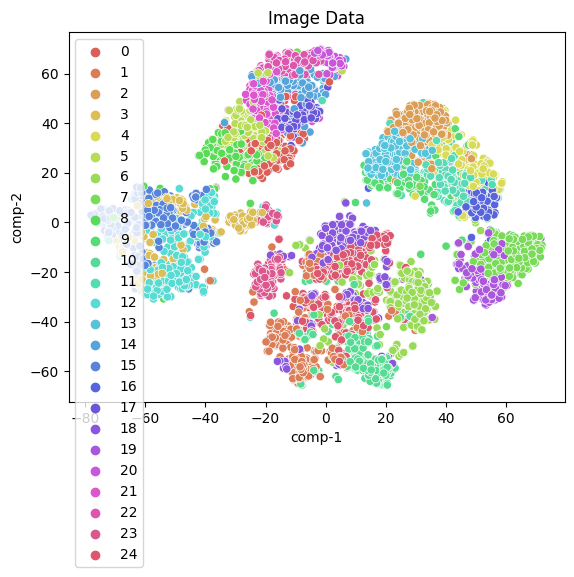

In [97]:
from sklearn.cluster import KMeans
import copy

kmeans_main = KMeans(n_clusters=25, random_state=0, n_init="auto").fit(train_features)
# kmeans_main.labels_[kmeans_main.labels_ == 19] = 7
# for i in range(20, 25):
#         kmeans_main.labels_[kmeans_main.labels_ == i] = i - 1

# kmeans_main.labels_[kmeans_main.labels_ == 6] = 1
# for i in range(7, 24):
#     kmeans_main.labels_[kmeans_main.labels_ == i] = i - 1


df = pd.DataFrame()
df["y"] = kmeans_main.labels_
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(np.unique(kmeans_main.labels_))),
                data=df).set(title="Image Data")
plt.show()

12 and 15 will be merged
3 and 12 will be merged
5 and 8 will be merged
1 and 21 will be merged
1 and 9 will be merged
7 and 15 will be merged
6 and 7 will be merged
4 and 8 will be merged
0 and 5 will be merged
1 and 11 will be merged
4 and 6 will be merged
7 and 12 will be merged
0 and 7 will be merged
0 and 10 will be merged
4 and 7 will be merged
2 and 6 will be merged
1 and 8 will be merged
1 and 5 will be merged
2 and 4 will be merged
0 and 5 will be merged


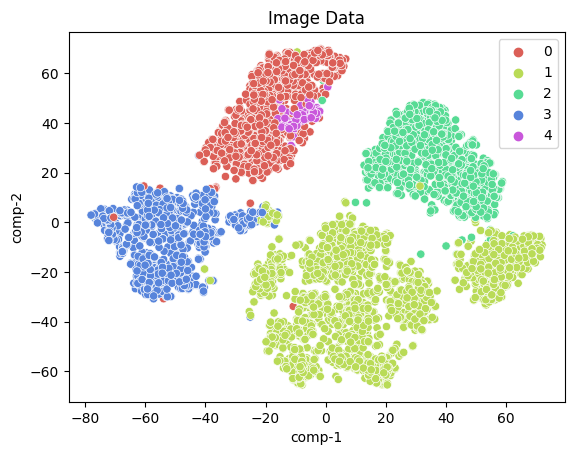

In [98]:
import math

kmeans = copy.deepcopy(kmeans_main)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

def calculate_distance(arr1, arr2):
    return math.sqrt(sum((e1-e2)**2 for e1, e2 in zip(arr1, arr2)))

while centers.shape[0] != 5:
    min_distance = 99999999
    index = 0
    change_index = 0
    for i in range(centers.shape[0]):
        for j in range(i+1, centers.shape[0]):
            euclidean_distance = calculate_distance(centers[i], centers[j])
            if euclidean_distance < min_distance:
                min_distance = euclidean_distance
                index = i
                change_index = j

    change_index_length = labels[labels == change_index].shape[0]
    index_length = labels[labels == index].shape[0]
    centers[index] = (centers[change_index] * change_index_length + centers[index] * index_length) / (change_index_length + index_length)
    for i in range(change_index, centers.shape[0]-1):
        centers[i] = centers[i+1]
    centers = centers[:-1]
    # print(f'{len(np.unique(labels))} before')
    # print(np.unique(labels))
    labels[labels == change_index] = index
    # print(len(np.unique(labels)))
    for i in range(change_index+1, centers.shape[0]+1):
        labels[labels == i] = i - 1
    print(f'{index} and {change_index} will be merged')
    
df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(np.unique(kmeans.labels_))),
                data=df).set(title="Image Data")
plt.show()

In [53]:
# from sklearn.cluster import MeanShift, estimate_bandwidth


# # ESTIMATE = estimate_bandwidth(train_features, quantile=0.2, n_samples=20)
# ESTIMATE = (1 / (0.1**2 * train_features.shape[1]))
# clustering = MeanShift(bandwidth=ESTIMATE, bin_seeding=True).fit(train_features)
# df = pd.DataFrame()
# df["y"] = clustering.labels_
# df["comp-1"] = z[:, 0]
# df["comp-2"] = z[:, 1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("hls", len(np.unique(clustering.labels_))),
#                 data=df).set(title="Image data")
# import matplotlib.pyplot as plt
# plt.show()

In [52]:
# from sklearn.cluster import DBSCAN

# clustering = DBSCAN(eps=25, min_samples=200, metric='euclidean').fit(train_features)
# df = pd.DataFrame()
# df["y"] = clustering.labels_
# df["comp-1"] = z[:, 0]
# df["comp-2"] = z[:, 1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("hls", len(np.unique(clustering.labels_))),
#                 data=df).set(title="Image data")
# import matplotlib.pyplot as plt
# plt.show()

In [50]:
# from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering(n_clusters=5).fit(train_features)
# df = pd.DataFrame()
# df["y"] = clustering.labels_
# df["comp-1"] = z[:, 0]
# df["comp-2"] = z[:, 1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("hls", len(np.unique(clustering.labels_))),
#                 data=df).set(title="Image data")
# import matplotlib.pyplot as plt
# plt.show()

In [47]:
kmeans.cluster_centers_ = centers
kmeans.labels_ = labels
y_predict = kmeans.predict(train_features_w_domain)
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(np.asanyarray(image_labels_w_domain).reshape(1000), y_predict)

0.6643365056067793

In [54]:
# Test Data with image labels
test_features, test_image_labels = load_data(False)
test_features = pd.DataFrame(test_features)
test_image_labels = pd.DataFrame(test_image_labels)

y_predict_test = kmeans_main.predict(test_features)
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(np.asanyarray(test_image_labels).reshape(10000), y_predict_test)

0.052380394896955555